**Problem Statement:**
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Attribute Information**<br>

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. <br>

Name / Data Type / Measurement Unit / Description
-----------------------------
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years. <br>

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [59]:
## Importing neccessary liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Reading the dataset
df=pd.read_csv('abalone.csv')
df1=df ##saving a copy of original dataset
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
df.shape

(4177, 9)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- we have 4177 observations and 9 columns
- 'Rings' is our label
- we have 1 feature with catagorical data and 7 features with numeric data

In [63]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

- We do not have any missing values in dataset

#### Encoding catogorical feature 'Sex'

In [64]:
enc=pd.get_dummies(df['Sex'],drop_first=True)

In [65]:
df=pd.concat([enc,df],axis=1)
df=df.drop(['Sex'],axis=1)
df.head()

,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Successfully encoded feature 'Sex'

#### Checking the distributions of our features

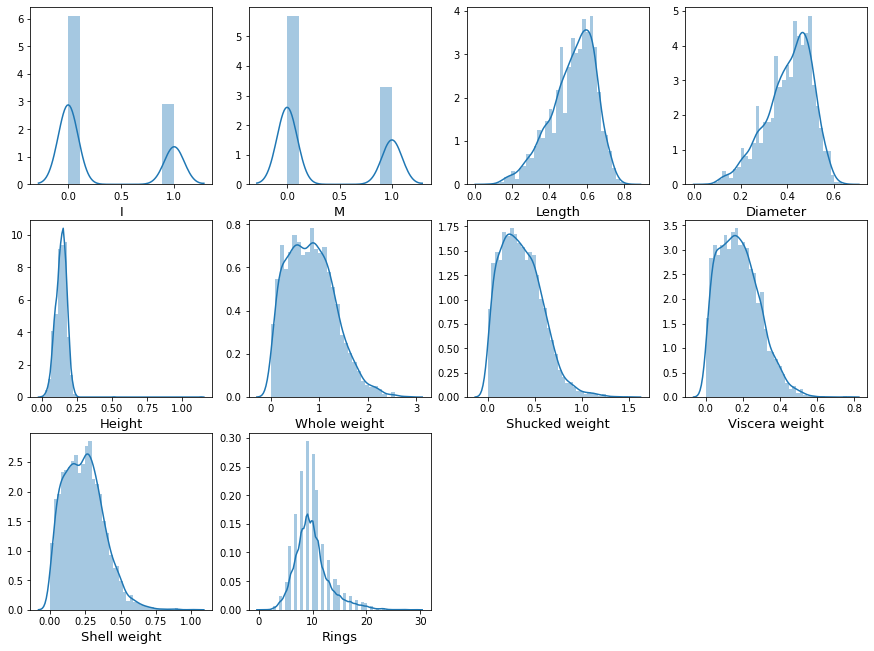

In [66]:
# Visualizing the distributions of features
plt.figure(figsize=(15,15))
plot_number=1

parameters = {'ytick.labelsize': 10,
          'xtick.labelsize': 10}
plt.rcParams.update(parameters)


for i in df:
    if plot_number<=15:
        ax=plt.subplot(4,4,plot_number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=13)
    plot_number+=1


#### Checking the skewness

In [67]:
df.drop('Rings',axis=1).skew()

I                 0.765708
M                 0.557390
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

- Ignoring 'I', 'M' here as they are catagorical 
- All features have skewness (Theshold= +/- 0.5)

#### Checking the outliers

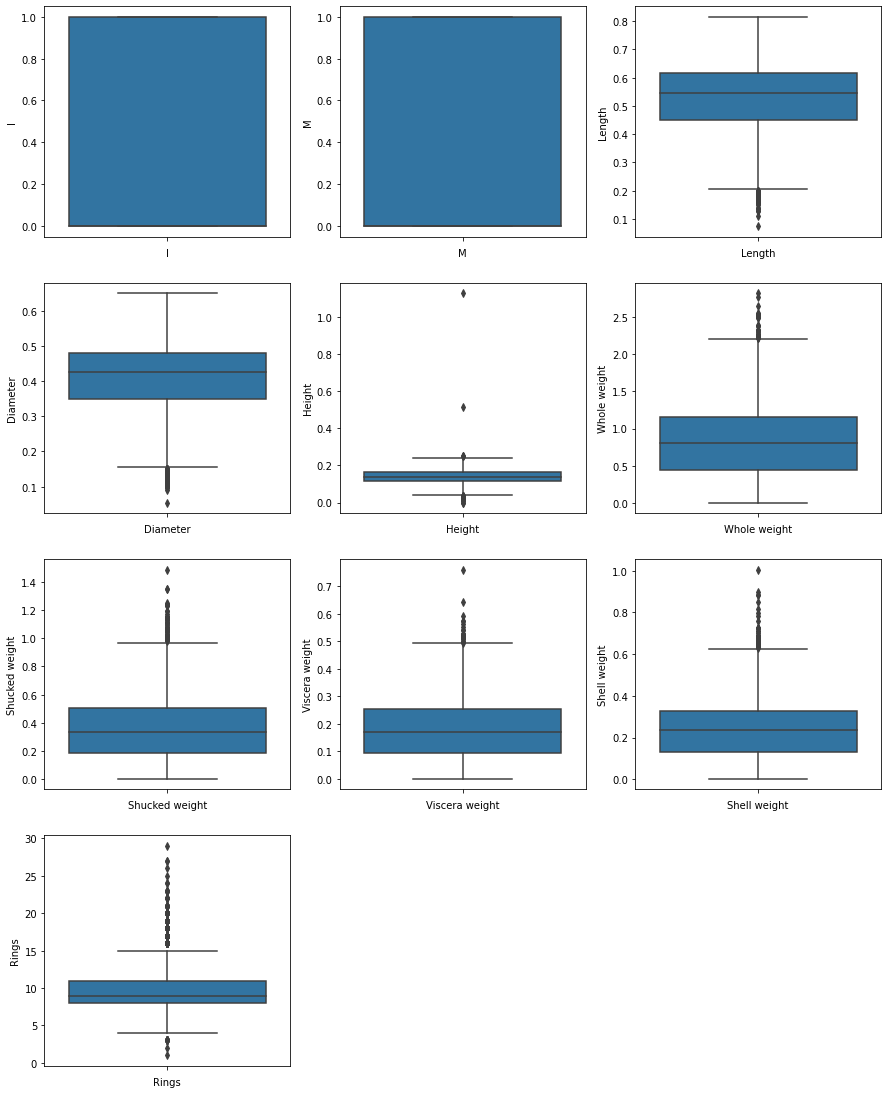

In [68]:
plt.figure(figsize=(15,50))
plotnumber=1

parameters = {'ytick.labelsize': 10,
          'xtick.labelsize': 10}
plt.rcParams.update(parameters)

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

- Ignoring 'F', 'I', 'M' here as they are catagorical 
- All features have outliers

#### Removing Outliers

In [69]:
# rejecting data beyond 3 std to manage skewness
from scipy.stats import zscore

z_score=zscore(df[['Length','Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

df.shape

(4084, 10)

In [70]:
loss=(4177-4084)/4177*100
loss

2.2264783337323437

We are losing only 2.2% data which is acceptable

In [71]:
df.drop('Rings',axis=1).skew()

I                 0.750283
M                 0.570558
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
dtype: float64

Now only 'Length' and 'Diameter' features have skewness

#### Removing Skewness using square transformation

In [72]:
df.loc[:,['Diameter']]=np.square(df.loc[:,['Diameter']]).astype(float)
df.loc[:,['Length']]=np.square(df.loc[:,['Length']]).astype(float)

In [73]:
df.skew()

I                 0.750283
M                 0.570558
Length           -0.129809
Diameter         -0.083665
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

- We have successfully reduced the skewness in our data

#### Checking the relation of our features with the label

In [74]:
df.corr()['Rings']

I                -0.429190
M                 0.177976
Length            0.523290
Diameter          0.543932
Height            0.597622
Whole weight      0.533165
Shucked weight    0.413036
Viscera weight    0.497026
Shell weight      0.618991
Rings             1.000000
Name: Rings, dtype: float64

- **All our features show moderate correlation with our label**

Text(0.5, 1.0, 'Correlation')

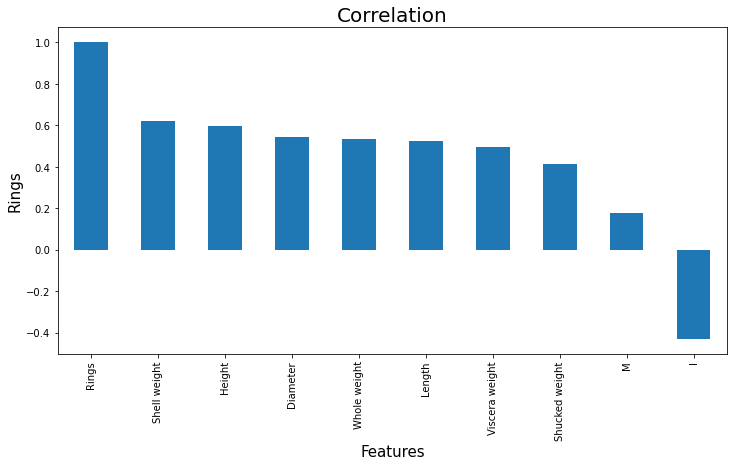

In [75]:
## Visualizing the correlation
plt.figure(figsize=(12,6))
df.corr()['Rings'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Rings',fontsize=15)
plt.title('Correlation',fontsize=20)

#### Visualizing the relation between features and label

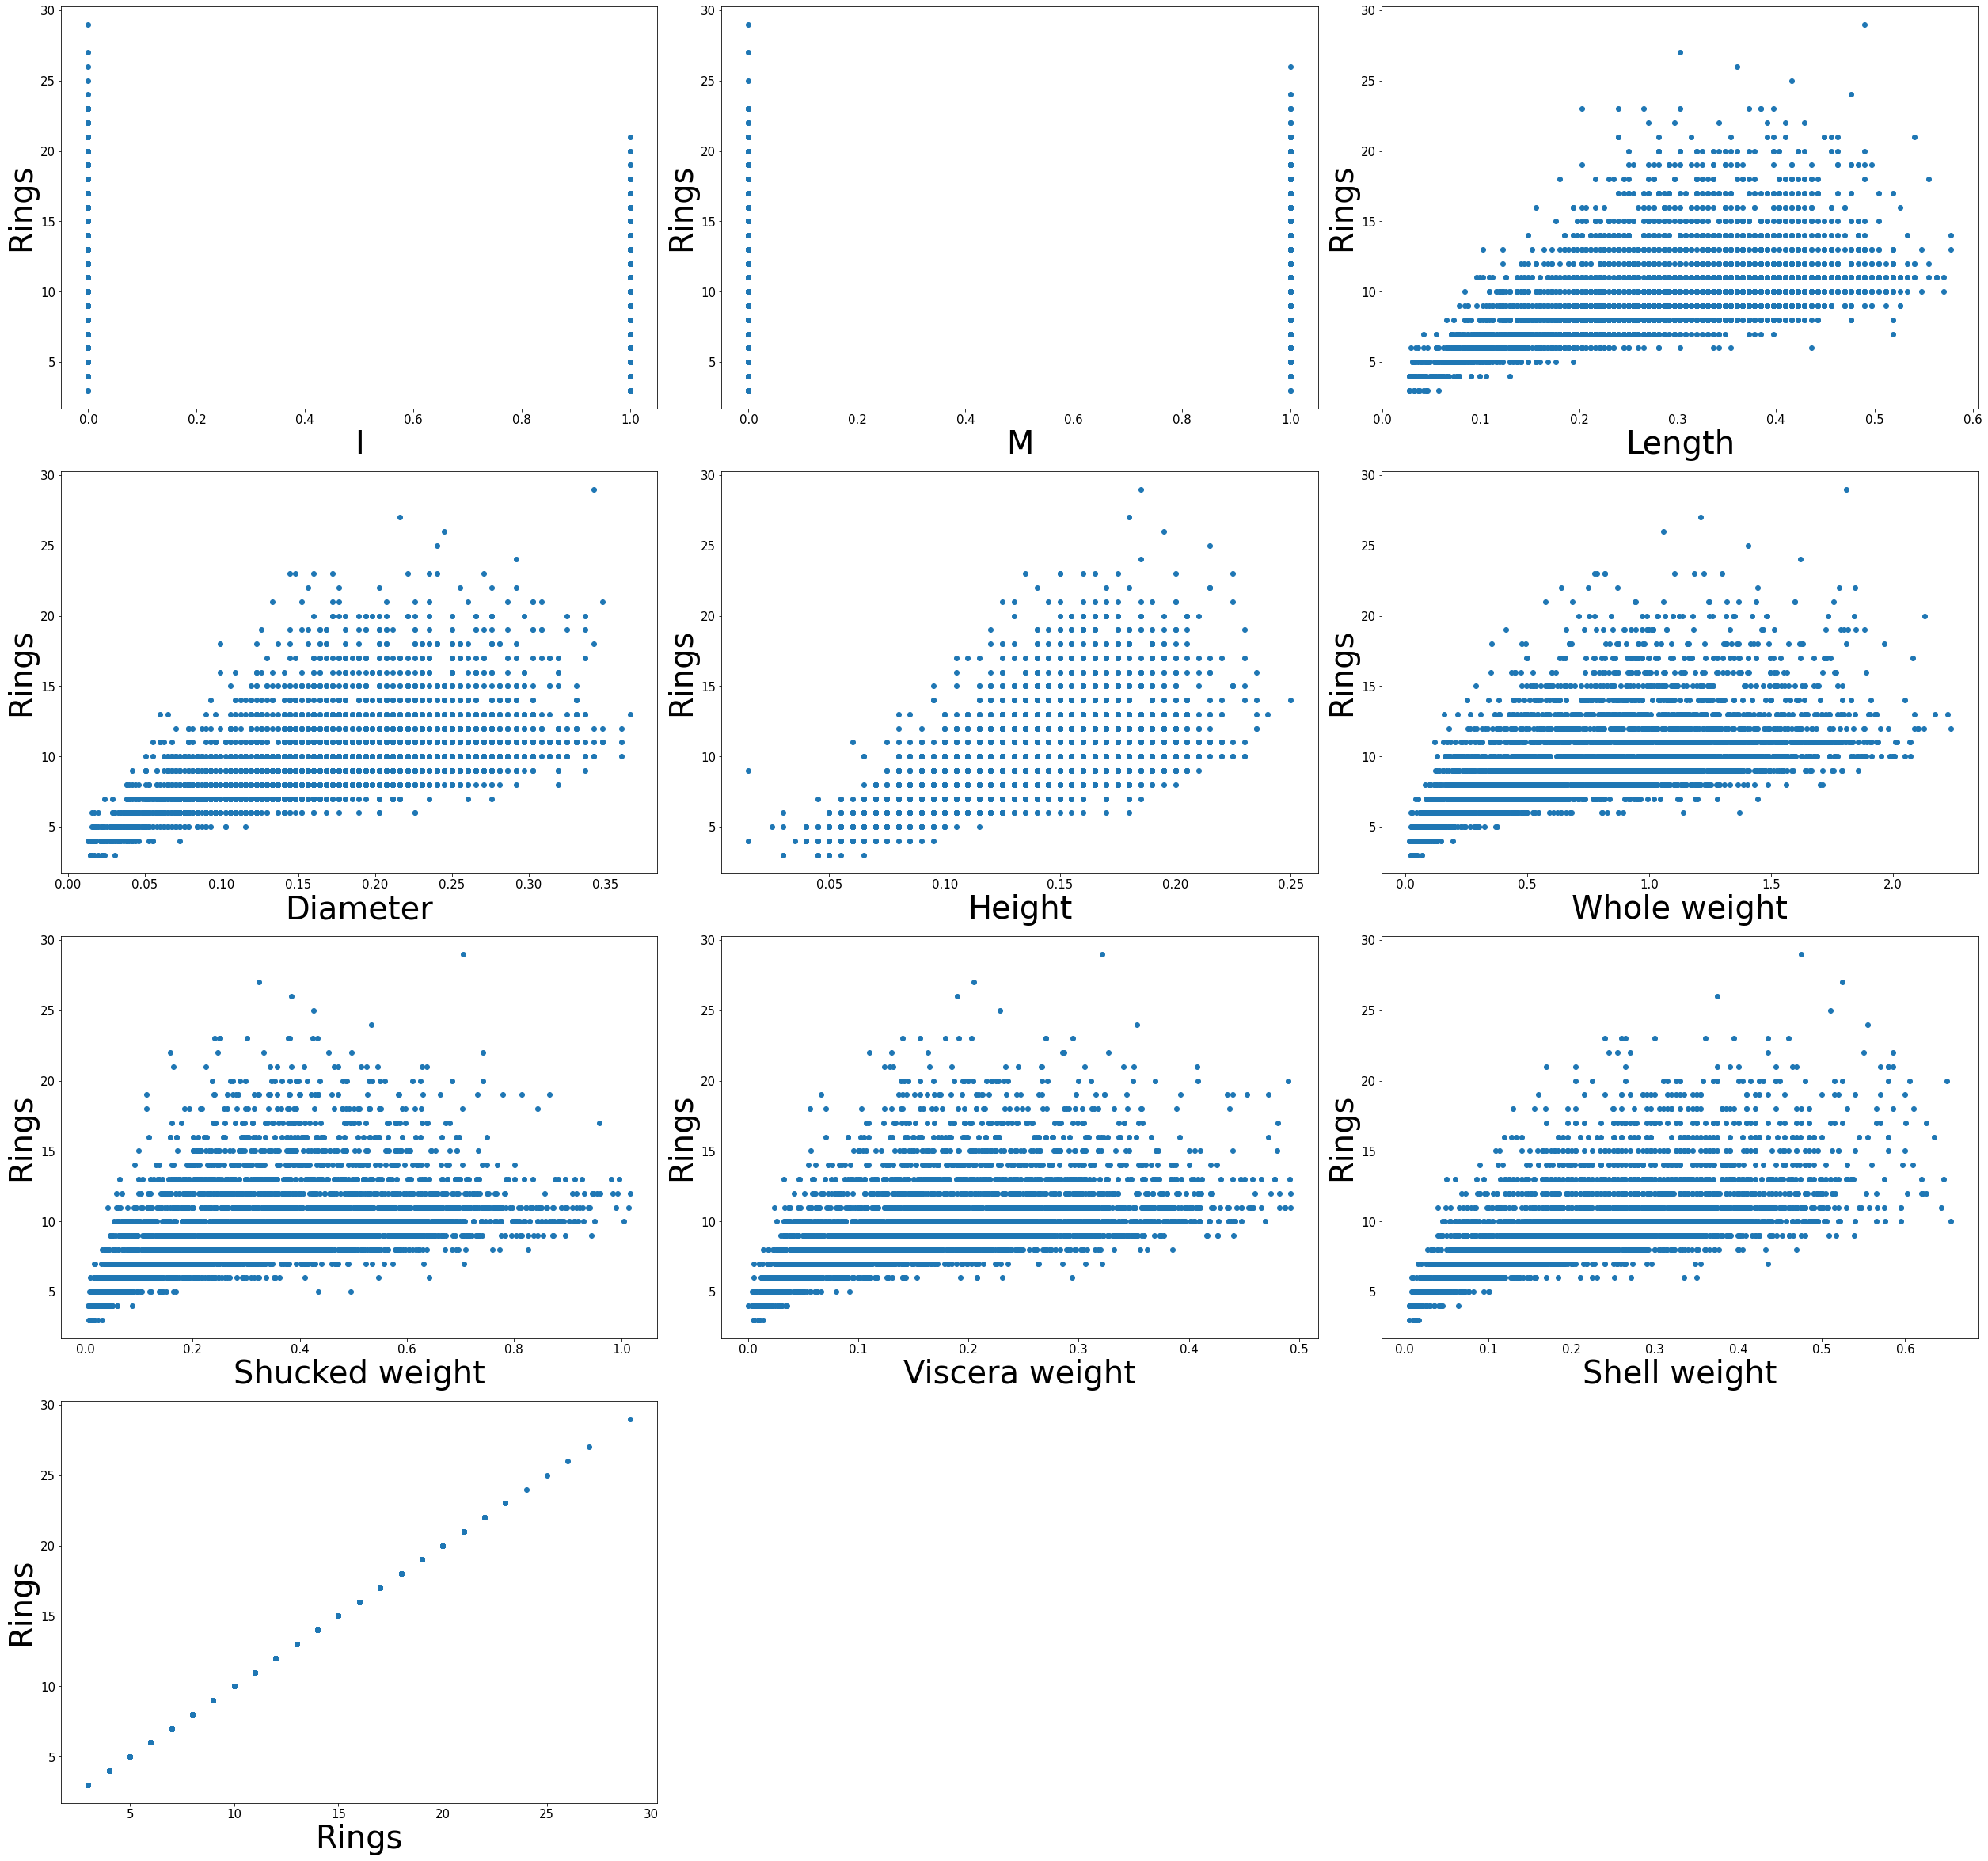

In [76]:
plt.figure(figsize=(35,40),facecolor='white')
plotnumber=1

parameters = {'ytick.labelsize': 15,
          'xtick.labelsize': 15}
plt.rcParams.update(parameters)


for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['Rings'])
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Rings', fontsize=40)
    plotnumber+=1
plt.tight_layout()

- **Based on the above visualisation, LinearRegression or SVR may fit our data best.**

#### Seperating Features and Label

In [77]:
X=df.drop('Rings',axis=1)
y=df['Rings']
X.head()

,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,1,0.207025,0.133225,0.095,0.5140,0.2245,0.1010,0.150
1,0,1,0.122500,0.070225,0.090,0.2255,0.0995,0.0485,0.070
2,0,0,0.280900,0.176400,0.135,0.6770,0.2565,0.1415,0.210
3,0,1,0.193600,0.133225,0.125,0.5160,0.2155,0.1140,0.155
4,1,0,0.108900,0.065025,0.080,0.2050,0.0895,0.0395,0.055


#### Scaling the data

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
X=scaler.fit_transform(X)

#### Splitting our data into training and testing sets

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

#### Importing regression permormance metrics

In [82]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

## Model 1: Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr=LinearRegression()

In [85]:
lr.fit(X_train,y_train)
y_lr=lr.predict(X_test)

In [86]:
r2_score(y_test,y_lr)

0.49502978219053007

In [87]:
cross_val_score(lr,X,y,cv=5).mean()

0.4105527583023229

## Regularization

In [88]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

### Lasso

In [89]:
lassoCV=LassoCV(alphas=np.arange(0.001,0.1,0.01), max_iter=1000, normalize=True)

In [90]:
lassoCV.fit(X_train,y_train)

LassoCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [91]:
lassoCV.alpha_

0.001

In [92]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_lasso=lasso.predict(X_test)

In [93]:
r2_score(y_test,y_lasso)

0.49482852257616894

In [94]:
cross_val_score(lasso,X,y,cv=7).mean()

0.4409054034551199

### Ridge

In [95]:
ridgeCV=RidgeCV(alphas=[0.002,0.001,0.1,0.01,1,10],normalize=True)

In [96]:
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([2.e-03, 1.e-03, 1.e-01, 1.e-02, 1.e+00, 1.e+01]),
        normalize=True)

In [97]:
ridgeCV.alpha_

0.001

In [98]:
ridge=Ridge(alpha=0.001)

In [99]:
ridge.fit(X_train,y_train)
y_ridge=ridge.predict(X_test)

In [100]:
r2_score(y_test,y_ridge)

0.4950296842337991

In [101]:
cross_val_score(ridge,X,y,cv=7).mean()

0.4407270695252598

## Model 2: ADA Boost Regressor

In [102]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

In [103]:
ada.fit(X_train,y_train)
y_ada=ada.predict(X_test)

In [104]:
r2_score(y_test,y_ada)

0.2994269619216303

In [105]:
cross_val_score(ada,X,y,cv=5).mean()

-0.19669267080935124

**Scores are too poor for ADA boost. Hence we will reject this model and will not perform hyperparamter tuning.**

## Model 3: Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [107]:
dt.fit(X_train,y_train)
y_dt=dt.predict(X_test)

In [108]:
r2_score(y_test,y_dt)

0.15567166897941043

In [109]:
cross_val_score(dt,X,y,cv=5).mean()

-0.17887455111941467

**Scores are too poor for Decision Tree model. Hence we will reject this model and will not perform hyperparamter tuning.**

## Model 4: Random forrest

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [111]:
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)

In [112]:
r2_score(y_test,y_rf)

0.4859896691794314

In [113]:
cross_val_score(rf,X,y,cv=5).mean()

0.4132039140987816

## Hyperparameter tuning for RF

In [114]:
rf_grid={'min_samples_split':[2,4,6,7],'min_samples_leaf':[2,3,4,5],'n_estimators':[90,100,120,130,140]}

In [115]:
gridsearch_rf=GridSearchCV(estimator=rf,param_grid=rf_grid,n_jobs=-1)

In [116]:
gridsearch_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 7],
                         'n_estimators': [90, 100, 120, 130, 140]})

In [117]:
gridsearch_rf.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 140}

In [118]:
rf_best=RandomForestRegressor(min_samples_leaf= 5, min_samples_split=4, n_estimators=140)

In [119]:
rf_best.fit(X_train,y_train)
y_rfBest=rf_best.predict(X_test)

In [120]:
r2_score(y_test,y_rfBest)

0.5009010753949001

In [121]:
cross_val_score(rf_best,X,y,cv=7).mean()

0.47240318227353006

## Model 5: SVM Regressor

In [122]:
from sklearn.svm import SVR

In [123]:
svr=SVR()

In [124]:
svr.fit(X_train,y_train)
y_svr=svr.predict(X_test)

In [125]:
r2_score(y_test,y_svr)

0.48189248818775043

In [126]:
cross_val_score(svr,X,y,cv=5).mean()

0.47986921986252706

## Hyperparameter tuning for SVR

In [127]:
svr_grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[0.1,0.2,1,2,4,10],
           'gamma':[0.01,0.05,0.1,0.2,0.3,0.4]}

In [128]:
gridsearch_svr=GridSearchCV(estimator=svr,param_grid=svr_grid,n_jobs=-1)

In [129]:
gridsearch_svr.fit(X_train,y_train)


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 1, 2, 4, 10],
                         'gamma': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [130]:
gridsearch_svr.best_params_

{'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}

In [131]:
svr_best=SVR(C=10, gamma=0.5, kernel='rbf')

In [132]:
svr_best.fit(X_train,y_train)

SVR(C=10, gamma=0.5)

In [133]:
y_svrBest=svr_best.predict(X_test)

In [134]:
r2_score(y_test,y_svrBest)

0.4845470176330806

In [135]:
cross_val_score(svr_best,X,y,cv=7).mean()

0.46656160603584446

## Model 6: KNN Regressor

In [136]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [137]:
knn.fit(X_train,y_train)
y_knn=knn.predict(X_test)

In [138]:
r2_score(y_test,y_knn)

0.4555673186996487

In [139]:
cross_val_score(knn,X,y,cv=5).mean()

0.37211266417417094

### HyperParameter tuning for KNN

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
param_grid={'algorithm':['kd_tree','brute','ball_tree'],
           'leaf_size':[15,20,25,30,35],'n_neighbors':[7,9,15,20]}

In [142]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [143]:
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 15}

In [144]:
knn_best=KNeighborsRegressor(algorithm='kd_tree', leaf_size=15, n_neighbors=15)

In [145]:
knn_best.fit(X_train,y_train)
y_knnBest=knn_best.predict(X_test)

In [146]:
r2_score(y_test,y_knnBest)

0.4658618660021522

In [147]:
cross_val_score(knn_best,X,y,cv=7).mean()

0.4471961180994923

In [148]:
print('cross_val_lr: ',cross_val_score(lr,X,y,cv=7).mean())
print('cross_val_lasso: ',cross_val_score(lasso,X,y,cv=7).mean())
print('cross_val_ridge: ',cross_val_score(ridge,X,y,cv=7).mean())
print('cross_val_knn: ',cross_val_score(knn_best,X,y,cv=7).mean())
print('cross_val_rf: ',cross_val_score(rf_best,X,y,cv=7).mean())
print('cross_val_svr: ',cross_val_score(svr_best,X,y,cv=7).mean())

cross_val_lr:  0.4407268250103427
cross_val_lasso:  0.4409054034551199
cross_val_ridge:  0.4407270695252598
cross_val_knn:  0.4471961180994923
cross_val_rf:  0.47567289373397115
cross_val_svr:  0.46656160603584446


**Based on the cross validation scores, we can conclude that RF is our best model for the given dataset.**

In [149]:
## Saving the best model
import pickle
filename='abalone_rf.pkl'
pickle.dump(rf_best,open(filename,'wb'))